/tmp/ipykernel_9443/1743300943.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["rating"].fillna(data["rating"].median(), inplace=True)
/tmp/ipykernel_9443/1743300943.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

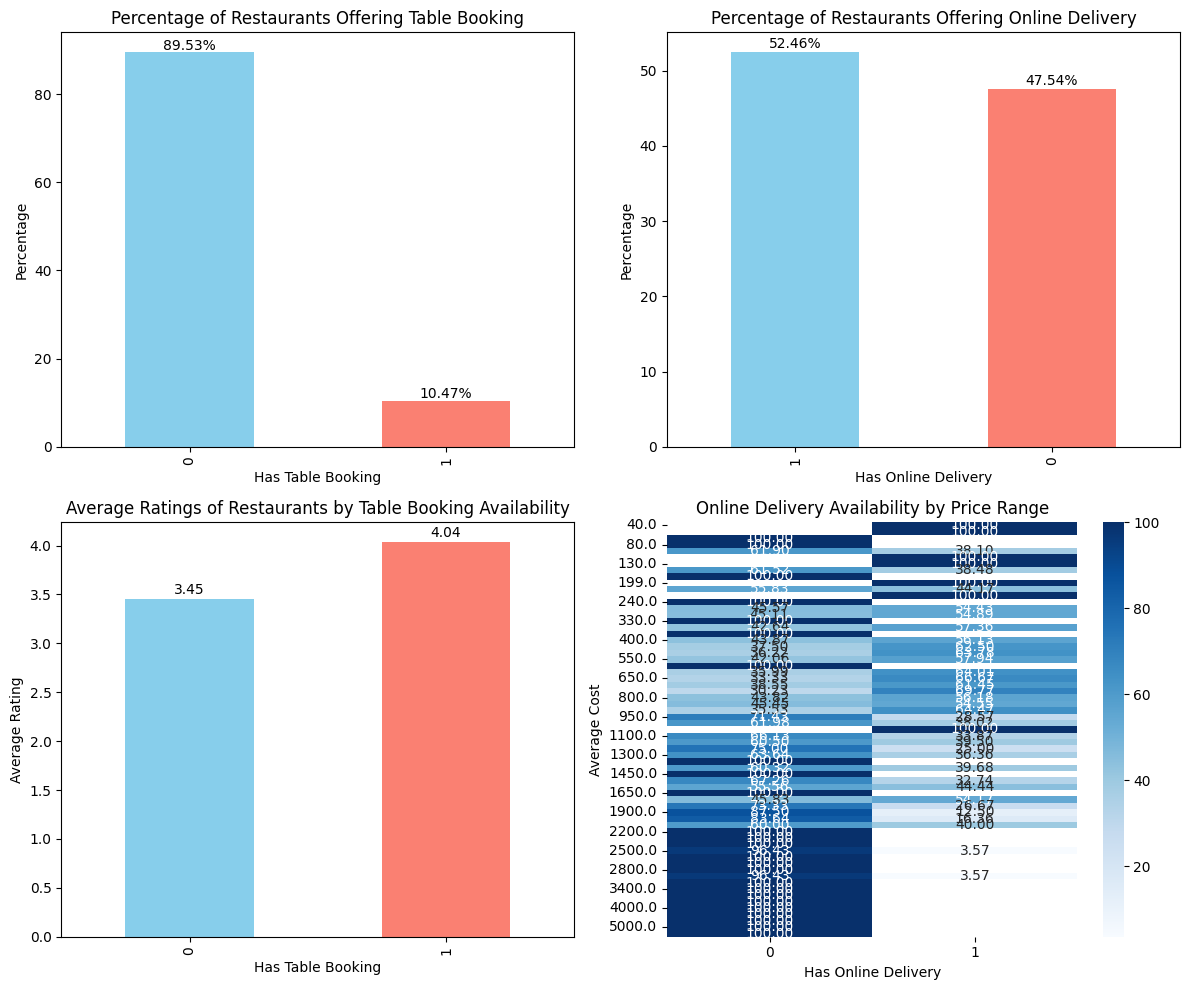

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """Load dataset and handle errors gracefully."""
    try:
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except pd.errors.ParserError:
        print("Error: Issue parsing the CSV file.")
    except Exception as e:
        print(f"Unexpected error: {e}")
    return None

def clean_data(data):
    """Clean column names and handle missing values."""
    # Rename columns
    data = data.rename(columns={
        "restaurant name": "restaurant_name",
        "rate (out of 5)": "rating",
        "num of ratings": "num_ratings",
        "avg cost (two people)": "avg_cost",
        "online_order": "has_online_delivery",
        "table booking": "has_table_booking",
        "cuisines type": "cuisine_type"
    })
    
    # Drop unnecessary columns
    data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True, errors='ignore')

    # Convert categorical Yes/No to 1/0
    data["has_online_delivery"] = data["has_online_delivery"].map({"Yes": 1, "No": 0})
    data["has_table_booking"] = data["has_table_booking"].map({"Yes": 1, "No": 0})

    # Convert rating to numeric and handle missing values
    data["rating"] = pd.to_numeric(data["rating"], errors='coerce')
    data["rating"].fillna(data["rating"].median(), inplace=True)

    # Fill missing avg_cost with median value
    data["avg_cost"].fillna(data["avg_cost"].median(), inplace=True)
    
    return data

def calculate_percentage(series):
    """Compute normalized percentages."""
    return series.value_counts(normalize=True) * 100

def compare_average_ratings(data):
    """Compute average rating based on table booking availability."""
    return data.groupby('has_table_booking')["rating"].mean()

def analyze_online_delivery_by_price(data):
    """Compute percentage of online delivery availability by price range."""
    return data.groupby('avg_cost')['has_online_delivery'].value_counts(normalize=True).unstack() * 100

def visualize_results(table_booking_percentage, online_delivery_percentage, avg_rating_table_booking, online_delivery_by_price):
    """Generate plots for analysis."""
    plt.figure(figsize=(12, 10))

    # Bar plot for table booking percentage
    plt.subplot(2, 2, 1)
    table_booking_percentage.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title("Percentage of Restaurants Offering Table Booking")
    plt.xlabel("Has Table Booking")
    plt.ylabel("Percentage")
    for i, v in enumerate(table_booking_percentage.values):
        plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

    # Bar plot for online delivery percentage
    plt.subplot(2, 2, 2)
    online_delivery_percentage.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title("Percentage of Restaurants Offering Online Delivery")
    plt.xlabel("Has Online Delivery")
    plt.ylabel("Percentage")
    for i, v in enumerate(online_delivery_percentage.values):
        plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

    # Bar plot for average ratings
    plt.subplot(2, 2, 3)
    avg_rating_table_booking.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title("Average Ratings of Restaurants by Table Booking Availability")
    plt.xlabel("Has Table Booking")
    plt.ylabel("Average Rating")
    for i, v in enumerate(avg_rating_table_booking.values):
        plt.text(i, v + 0.05, f"{v:.2f}", ha='center')

    # Heatmap for online delivery vs. price range
    plt.subplot(2, 2, 4)
    sns.heatmap(online_delivery_by_price, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Online Delivery Availability by Price Range")
    plt.xlabel("Has Online Delivery")
    plt.ylabel("Average Cost")

    plt.tight_layout()
    plt.show()

def main():
    file_path = "zomato.csv"  # Correct file path for the uploaded CSV
    data = load_data(file_path)
    if data is None:
        return

    data = clean_data(data)
    
    # Compute statistics
    table_booking_percentage = calculate_percentage(data["has_table_booking"])
    online_delivery_percentage = calculate_percentage(data["has_online_delivery"])
    avg_rating_table_booking = compare_average_ratings(data)
    online_delivery_by_price = analyze_online_delivery_by_price(data)

    # Visualize results
    visualize_results(table_booking_percentage, online_delivery_percentage, avg_rating_table_booking, online_delivery_by_price)

if __name__ == "__main__":
    main()
